In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline


In [123]:
all_data = pd.read_csv("LendingClub_LoanStats3a_v2.csv")

C:\Users\joseph.robie\Dropbox\Ongoing_Learning\Thinkful\Anaconda3.5\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First Analysis-->
Hypothesis – On average, larger loans, and also more loans, are given to customers with longer employment histories, home ownership, higher annual income, shorter term, a “verified” verification status, a small business purpose, and a higher “grade” rating.

Key Questions to Test: What is the breakout in loan size and number of loans given to customers by employment history length, home ownership, annual income, term, verification status, purpose, and grade?  Also, what is the size of the loan provided at each two-percentage point interest rate tier?

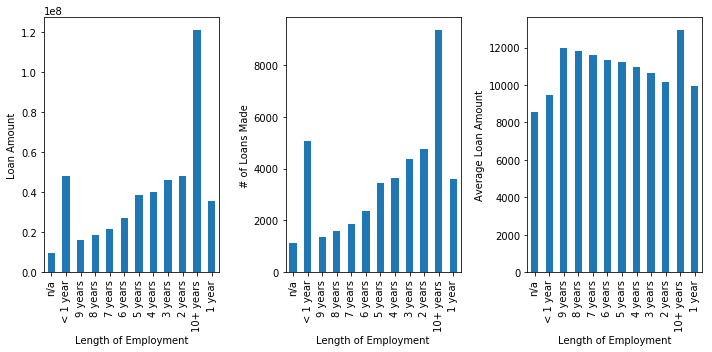

In [20]:
plt.subplot(1,3,1)
all_data.groupby("emp_length").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Loan Amount")
plt.xlabel("Length of Employment")

plt.subplot(1,3,2)
all_data.emp_length.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("# of Loans Made")
plt.xlabel("Length of Employment")

plt.subplot(1,3,3)
all_data.groupby("emp_length").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Length of Employment")

plt.tight_layout()
plt.show()

Key Takeaway and Analysis: 

The first chart indicates that overall, the sum of all loans provided to end consumers increases with less work history.  This result is understandable as people with less work history are more likely to apply for loans to help make key life purchases that cannot otherwise be funded with their small annual incomes.  The obvious exception here is that most laons were made to people who fell into the "10+ years" bucket: This exception likely stems from this category being a "catch all" bucket, which results in it having the largest number of members.

The second graph indicates that a larger number of loans are made to people with shorter work histoires, which again makes sense given these end users' need to supplement their low annual income.  The large number of loans made to people who fell into "10+ years" bucket helps further confirm our comment in the previous paragraph that more people fall into this "catch all" category--indicating one of the shortcomings to using categorical variables for data classification.  One key note to make, however, is that this assumption that more people fall into the "10+ years" category bucket assumes that each loan provided in the file from LendingClub is from a unique user and not the same set of people taking out multiple loans.

The third graph indicates that the average loan size increases the greater the length of employment for a loanee.  Such a result indicates that larger loans are made to people with longer work histories because they are deemded to be less of a credit risk and, thus, less likely to default on the loan made.  Also, the larger average loan size to people with greater work histories indicates that such people are likely making larger purchases and therefore requesting larger loans.

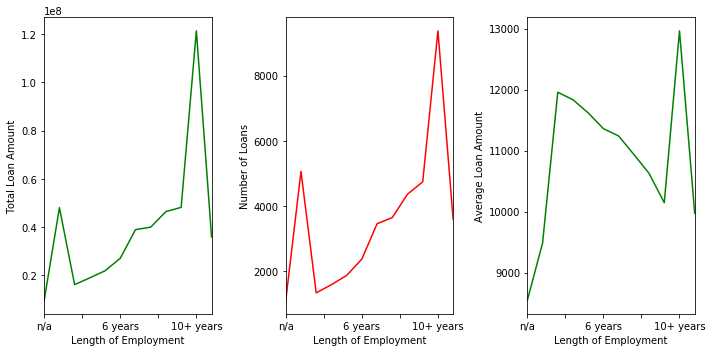

Key Takeaway: This chart indicates that a fewer number of loans are given out to customers as their work history grows.  The largest total laons are made to people with 10+ years of work experience because it is a "catch all" category that includes the largest number of people.


In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
all_data.groupby("emp_length").loan_amnt.sum().sort_index(ascending=False).plot(kind = "line", color = "green")
plt.ylabel("Total Loan Amount")
plt.xlabel("Length of Employment")

plt.subplot(1,3,2)
all_data.emp_length.value_counts().sort_index(ascending=False).plot(kind = "line", color = "red")
plt.ylabel("Number of Loans")
plt.xlabel("Length of Employment")

plt.subplot(1,3,3)
all_data.groupby("emp_length").loan_amnt.mean().sort_index(ascending=False).plot(kind = "line", color = "green")
plt.ylabel("Average Loan Amount")
plt.xlabel("Length of Employment")

plt.tight_layout()
plt.show()

Key Takeaway and Analysis: 
These graphs shows the same results as the bar graph above.  This analysis was done to directly contrast the visualization effects of a line versus a bar graph.  Frankly, from the standpoint of heping people grasp the key takeaway for each graph, these line graphs are best as they show the trend in loans across people of variying work histories.

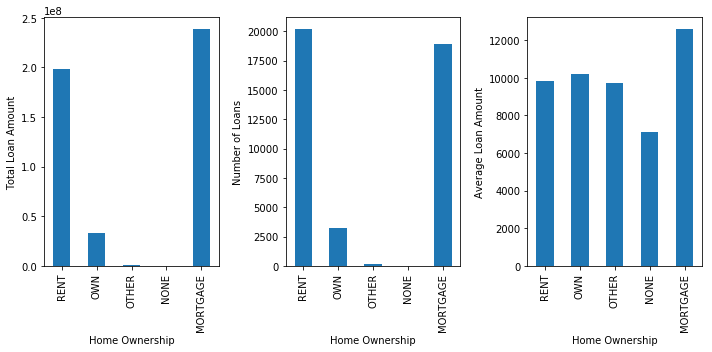

Key Takeaway: This chart indicates that, on average, the largest loans are made to people with mortgages followed closely by people who own homes.


In [21]:
plt.subplot(1,3,1)
all_data.groupby("home_ownership").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Home Ownership")

plt.subplot(1,3,2)
all_data.home_ownership.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Home Ownership")

plt.subplot(1,3,3)
all_data.groupby("home_ownership").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Home Ownership")

plt.tight_layout()
plt.show()

Key Takeaway and Analysis: 

The first chart indicates that the higest value of loans are made to people with mortgages while the second highest number of loans are made to people renting.  Such a result is somewhat expected given that most poeple are either mortgaging a home or renting one--many people do not own their home outright.  These two groups of people are also strained by high monthly payments that can leave them unprepared for emergency expenses that arise through a given year.

The second chart reveals that the most number of loans are made to people that rent followed by those who have a mortgage.  Again, these two categories have the largest number of people and those individuals are likely to need loans as new, unexpected expenses arise.

The last graph indicates that the average loan size was highest for people with mortgages, again not surprising as such people likely have the higest expenses and biggest families where unexpected expenses can force a need for short or longer-term loans.  Interestingly, the average loan size is relatively equal among those who rent, own, or fall in some other caegory; this result could steam from people all having the same type of spending patterns that outstrip their annual earnings.

Income Categories
(0, 20000]             3869.080882
(20000, 40000]         7358.302079
(40000, 60000]        10066.184317
(60000, 80000]        12315.438271
(80000, 100000]       13949.909856
(100000, 120000]      15205.469969
(120000, 150000]      16393.950517
(150000, 200000]      17921.579961
(200000, 10000000]    18986.496350
Name: loan_amnt, dtype: float64


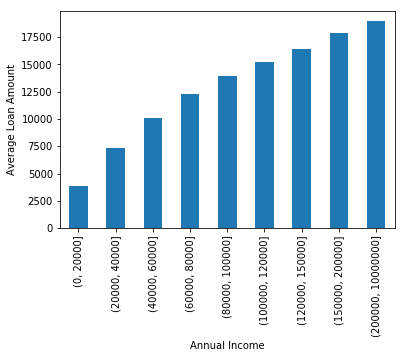

In [22]:
df = pd.DataFrame(all_data)

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 150000, 200000, 10000000]
df["Income Categories"] = pd.cut(df["annual_inc"], bins)
print(df.groupby("Income Categories")["loan_amnt"].mean())

df.groupby("Income Categories")["loan_amnt"].mean().plot(kind="bar")

plt.ylabel("Average Loan Amount")
plt.xlabel("Annual Income")

Key Takeaway and Analysis: 

This chart indicates that, on average, the largest loans are made to people with highest annual income.  Such a result indicates that individuals with higher annual incomes have a need for larger loans to meet their higher purchase tendencies.  Also, those people with higher annual incomes are likely deemed a lower credit risk and therefore, larger loans are made to them.

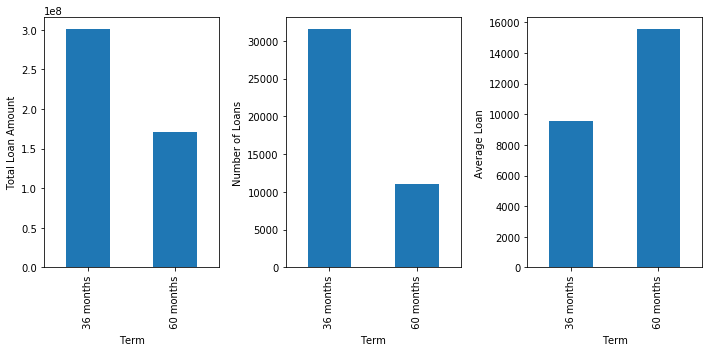

In [23]:
plt.subplot(1,3,1)
all_data.groupby("term").loan_amnt.sum().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Term")

plt.subplot(1,3,2)
all_data.term.value_counts().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Term")

plt.subplot(1,3,3)
all_data.groupby("term").loan_amnt.mean().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan")
plt.xlabel("Term")

plt.tight_layout()
plt.show()

Key Takeaway and Analysis: 

These three charts indicate that while the total amount of loans as well as the number of loans provided were higher for 36 month periods rather than 60 month periods, the average loan was higher for 60 months since far fewer loans were made in this term period overall.  The possible conclusions are that lenders have a preference for providing longer-term loans so they can earn more interest and also that fewer loanees want to take out 60-month loans to avoid carrying debt for that length of time.

[]

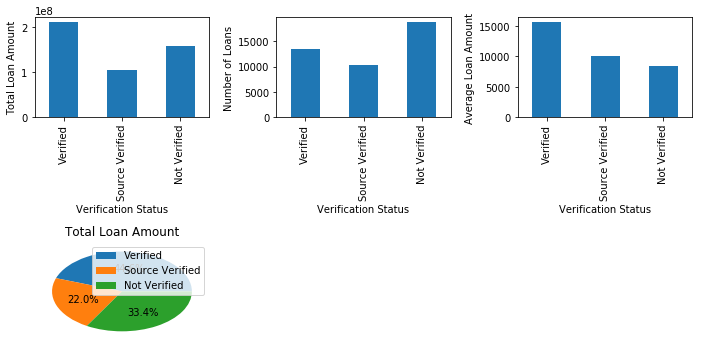

In [48]:
plt.subplot(2,3,1)
all_data.groupby("verification_status").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Verification Status")

plt.subplot(2,3,2)
all_data.verification_status.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Verification Status")

plt.subplot(2,3,3)
all_data.groupby("verification_status").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Verification Status")

plt.subplot(2,3,4)
plt.pie(all_data.groupby("verification_status").loan_amnt.sum().sort_index(ascending=False), autopct="%1.1f%%")
plt.legend(all_data.verification_status, loc="best")
plt.title("Total Loan Amount")

plt.tight_layout()
plt.plot()

Key Takeaway and Analysis: 

Due to the mixed results in the first two charts, the best takeaway from this analysis is drawn from the third graph, which indicates that the average loan was highest to individuals where income was verified.  For context, "not verified" means that those people did not have their income verified before a loan was made.  The two other options, "verified" and "source verified," indicate that LendingClub was able to verifthe person's income before a loan reqeust was closed out--it had recevived full funding from investors.  All loanees' income must be verified before the loan is formally approved by LendingClub, but some loans get funded so quickly (due to investor demand) that the income is only verified ater the fact.  

The takeaway here is that the high number of "not verified" loans point toward high investor demand and trust in the LendingClub system that incomes are verified before a deal is closed.  The pie chart indicates that the number of "not verified" loans is a third of all loans made, but, per the LendingClub Web site, this result is largely just due to demand and how the company defines a verified versus non-verified loan.  The third bar chart likely indicates that the average loan is highest for the verified and source verified loans as the loanees in those groups are most prepared to provide proper documentation ("W2"s and paystubs) required to move into the verified status bucket before their loans requests are filled; such prepared loanees are more likely to be making large loan requests to fund their large purchasing needs.

More information is available at https://www.lendingclub.com/public/income-verification.action

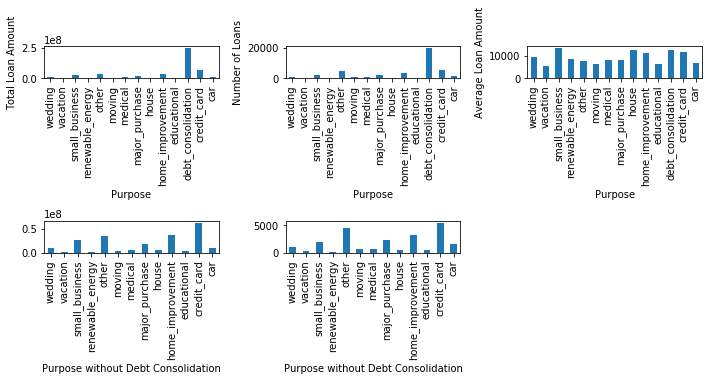

In [142]:
plt.subplot(2,3,1)
all_data.groupby("purpose").loan_amnt.sum().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Purpose")

plt.subplot(2,3,2)
all_data.purpose.value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Purpose")

plt.subplot(2,3,3)
all_data.groupby("purpose").loan_amnt.mean().sort_index(ascending=False).plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Purpose")

plt.subplot(2,3,4)
df1 = pd.DataFrame(all_data)
df1["Purpose without Debt Consolidation"] = df1[df1["purpose"] != "debt_consolidation"]["purpose"]

df = pd.DataFrame()
df["Total Amount without Debt Consolidation"] = df1.groupby("Purpose without Debt Consolidation").loan_amnt.sum()
df["Total Amount without Debt Consolidation"].sort_index(ascending=False).plot(kind="bar")

plt.subplot(2,3,5)
df["Number of Loans Made"] = df1["Purpose without Debt Consolidation"].value_counts()
df["Number of Loans Made"].sort_index(ascending=False).plot(kind="bar")

plt.tight_layout()
plt.show()

Key Takeaway and Analysis: 

The first graph indicates that the highest dollar value of loans are made to for debt consolidation purposes.  The second highest purpose, credit card payoff, is a distant second indicating that a visual of the "total loan amount" graph without the debt consolidation portion would provide a clearer view of the contrast among the other purposes stated by loanees.  Weddings, small busiensses, major purchases, and home imporvement are all noticably high as these are either key life expenses or unexpected expenses that require loanees to buy without the ability to wait and save.  

The second graph indicates that the largest number of loans are made for debt consolidation purposes, which again skews the visuals of the graph.  Again, weddings, small business, home improvement, and cars are the other purposes that drive people to seek loans.

The third graph indicates that the average loan size is larest for small businesses, followed closely by houses, debt consolidation, credit card, and home improvement.  Such a result does not come as a surprise as those purposes are typically the most expensive, driving that high average loan size.

The last two bar graphs in the second row of the subplots show a visual of the total loans made as well as the number of loans made with the "debt consolidation" purpose removed.  The removal of "debt consolidation" helps provide a better visual of the contrasts among the other purpose categories.

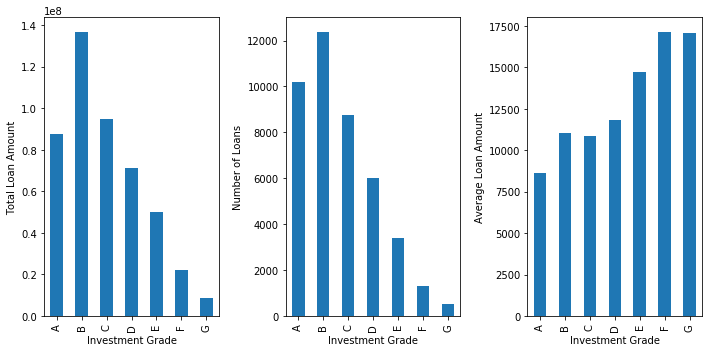

Key Takeaway: This chart indicates that the average loan size was highest for the F and G-rated investment loans and that the average loan size generally increases from A - G. Also of note, the total number of loans made as well as the sum of all loans made generally decreased from the highest investment grades to the lowest ones.


In [64]:
plt.subplot(1,3,1)
all_data.groupby("grade").loan_amnt.sum().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Loan Amount")
plt.xlabel("Investment Grade")

plt.subplot(1,3,2)
all_data.grade.value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Loans")
plt.xlabel("Investment Grade")

plt.subplot(1,3,3)
all_data.groupby("grade").loan_amnt.mean().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Loan Amount")
plt.xlabel("Investment Grade")

plt.tight_layout()
plt.show()

Key Takeaway and Analyis: 

The first chart indicates that with the exception of the "A" and "B" grade categories, total loans decrease as the investment grade declines.  Investors are less willing to loan to higher risk loanees.

The second chart indicates that with the execption of the  "B" grade category, the number of loans decreases as the investment grade declines.  Investors are less willing to loan to higher risk loanees.

The third chart indicates that the average loan size was highest for the F and G-rated investment loans and that the average loan size generally decreases from A - G.  The results of this bar chart showing average loan amount increasing per lower investment grade is difficult to explain.  A potential reson for the results could stem from lower credit loanees needing large amount of money to bail them out of precarious financial situations.  More analysis should be done to determine the relationship between investment grade and purpose for the loan as that might shed some light on why the average loan amount is so high for the lowest rated categories.

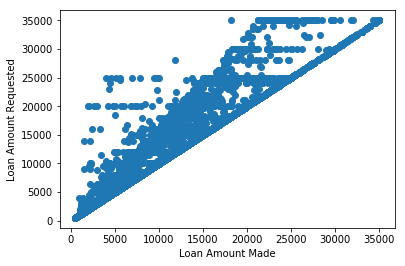

Key Takeaway: This chart, which shows the relationahip between loan amount requested and the loan amount provided indicates some heteroskedasticity, meaning the one variable is not a good predictor of the other.


In [142]:
plt.scatter(x=all_data.funded_amnt, y=all_data.loan_amnt)
plt.xlabel("Loan Amount Made")
plt.ylabel("Loan Amount Requested")
plt.show()

Key Takeaway and Analysis: 

This scatter chart, which shows the relationahip between loan amount requested and the loan amount provided indicates some heteroskedasticity, meaning the one variable is not a good predictor of the other.  While there is some relation due to many loanees getting funding for exactly the amount they requested for a loan, when the differences differ, they are not consistent.

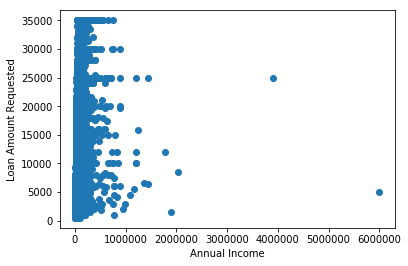

In [112]:
plt.scatter(x=all_data.annual_inc, y=all_data.loan_amnt)
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount Requested")
plt.show()

# How do I exclude the two outliers from this scatter plot?

Key Takeaway and Analysis:

This graph shows that for annual income and the loan amount requested, there is a strong correlation, but further analysis would need to be donw on this graph to exclude the two outlier for income in the 400,000 and 600,000 range.

Second Analysis-->
Hypothesis – Loans made to people with lower credit ratings are more likely to default.

Question 2: What is the relationship between loan status, grade, and sub grade?  Furthermore, what is the charge off rate per purpose and/title of use for each consumer?  Any relationship between charge off amount and state?

       Number of Charge Offs  Sum of Loans Made to Charged Off Accounts  \
grade                                                                     
A                        602                                  4695550.0   
B                       1433                                 15659725.0   
C                       1356                                 15029400.0   
D                       1130                                 13814375.0   
E                        725                                 11543500.0   
F                        323                                  6260900.0   
G                        101                                  1872825.0   

       Sum of All Loans Made  
grade                         
A                   85295150  
B                  133714950  
C                   93102750  
D                   70068700  
E                   48061025  
F                   21511400  
G                    8542175  


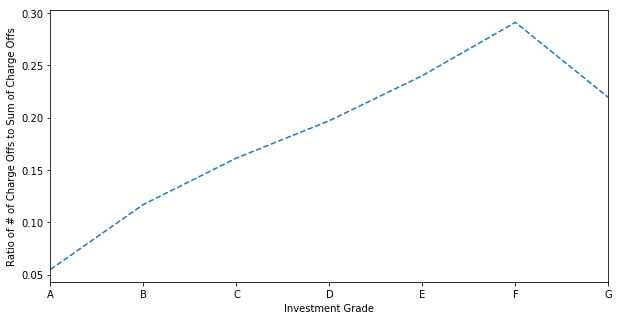

In [115]:
df = pd.DataFrame(all_data)

df["Loans Made to Charged Off Accounts"] = df[df["loan_status"]=="Charged Off"].loan_amnt

new_dataframe = pd.DataFrame()

new_dataframe["Number of Charge Offs"] = df.groupby("grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count())
new_dataframe["Sum of Loans Made to Charged Off Accounts"] = df.groupby("grade")["Loans Made to Charged Off Accounts"].sum()
new_dataframe["Sum of All Loans Made"] = df.groupby("grade")["funded_amnt"].sum()
new_dataframe["Ratio of Loans Made to Charged Off Account to Sum of All Loans Made"] = new_dataframe["Sum of Loans Made to Charged Off Accounts"] / new_dataframe["Sum of All Loans Made"]
print(new_dataframe.iloc[:,0:3])

new_dataframe["Ratio of Loans Made to Charged Off Account to Sum of All Loans Made"].plot(kind="line", linestyle="--", figsize=(10,5))
plt.ylabel("Ratio of # of Charge Offs to Sum of Charge Offs")
plt.xlabel("Investment Grade")

Key Takeaway and Analysis: 

This line graph indicates that as the investment grade decreases, the percentage of loans amounts charged off to total loans made in each investment grade increases.  This result is understandable given that higher risk loanees are more likely to defauult than their higher investment grade counterparts.  The dropoff, however, between the F and G investment grades does not follow the logical trend expected--given the lower investment grade, one would expect G to have a higher ratio than F.  Nevertheless, a potential explanation could stem from so few laons being made to the lowest investment grade that there was simply a lower chance of those individuals defaulting.

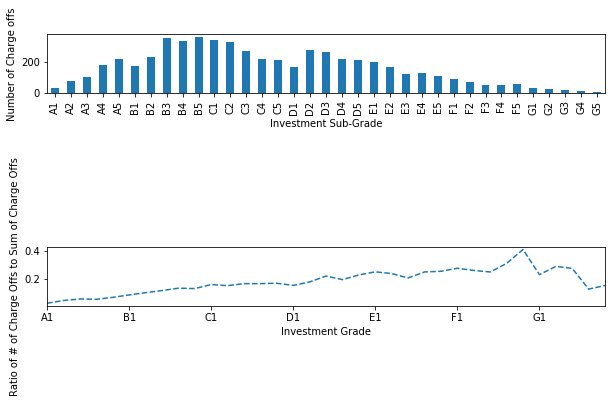

In [121]:
plt.subplot(4,1,1)
all_data.groupby("sub_grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count()).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Charge offs")
plt.xlabel("Investment Sub-Grade")

df = pd.DataFrame(all_data)

df["Loans Made to Charged Off Accounts"] = df[df["loan_status"]=="Charged Off"].loan_amnt

new_dataframe = pd.DataFrame()

new_dataframe["Number of Charge Offs"] = df.groupby("sub_grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count())
new_dataframe["Sum of Loans Made to Charged Off Accounts"] = df.groupby("sub_grade")["Loans Made to Charged Off Accounts"].sum()
new_dataframe["Sum of All Loans Made"] = df.groupby("sub_grade")["funded_amnt"].sum()
new_dataframe["Ratio of Loans Made to Charged Off Account to Sum of All Loans Made"] = new_dataframe["Sum of Loans Made to Charged Off Accounts"] / new_dataframe["Sum of All Loans Made"]

plt.subplot(4,1,4)
new_dataframe["Ratio of Loans Made to Charged Off Account to Sum of All Loans Made"].plot(kind="line", linestyle="--", figsize=(10,5))
plt.ylabel("Ratio of # of Charge Offs to Sum of Charge Offs")
plt.xlabel("Investment Grade")

Key Takeaway and Analysis: 

The first graph, the bar graph, reveals that the largest number of "Charge Offs" occured in the investment sub-grade level of B3-C2.  Note, that while this group is more in the mid-to-High point of investment grade riskiness it has the highest number of "charge offs" due to those categories having the largest number of loans made to loanees.

The second graph, the line graph, indicates that the trend in the ratio of charge offs to loans made in each investment category generally increases as the investtment grade declines.  Again, as in the previous analysis, we see that the proability of a charge off declines the farther into the G-investment grade a loanee falls, but the likely explanation is that so few investments are made in this category that there is a lower probability of a charge off.

Third Analysis-->

Hypothesis – More loans are made during the fourth quarter of October, November, and December since it falls during the holiday season.  Also, most people are seeking loans in the state of CA due to its sheer size and proximity to the tech sector.

Key Question to Test: Is there any seasonality in the data (note, all data is from 2017)?  What is the breakout of number of loans made by state?

Key Takeaway: This chart indicates that more loans are made toward the end of the year as the holiday seasons approach.
month
1     27606650
2     27735425
3     32443425
4     32566000
5     34008300
6     36454075
7     38355050
8     40775800
9     43888100
10    48619900
11    51736500
12    57512125
Name: loan_amnt, dtype: int64


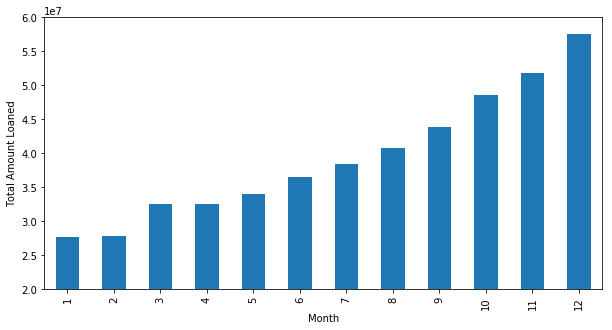

In [66]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

unique_months = all_data["month"].dt.month

all_data.groupby(all_data["month"].dt.month).loan_amnt.sum().sort_index().plot(kind="bar", figsize=(10,5))
plt.ylabel("Total Amount Loaned")
plt.ylim(20000000, 60000000)
plt.xlabel("Month")

print(all_data.groupby(all_data["month"].dt.month).loan_amnt.sum().sort_index())
#This prints all the months from the all_data["month"] column.

Key Takeaway and Analysis: 

This chart indicates that more loans are made toward the end of the year as the holiday seasons approach.  Given that the Thanksgiving and Christmas holidays fall in teh months 11 and 12, the results are not surprising.

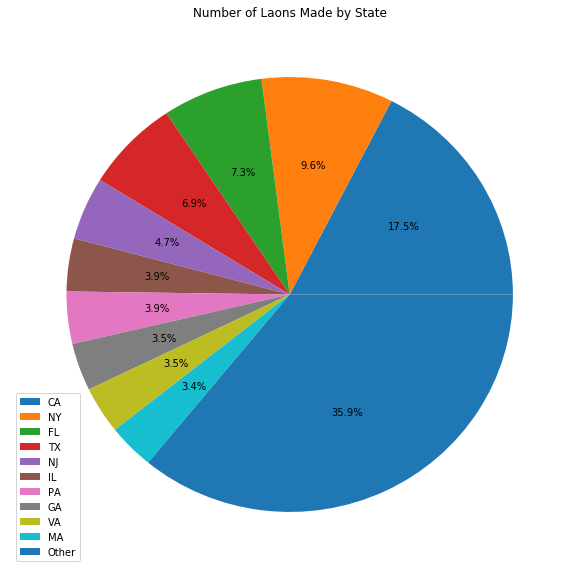

In [122]:
state_counts = pd.DataFrame(all_data.addr_state.value_counts())
other = int(state_counts[10:].sum())
state_counts = state_counts[:10]
state_counts.loc[11] = other

state_counts = state_counts.rename(index={11:"Other"})

plt.figure(figsize=(10,10))
plt.pie(state_counts, autopct="%1.1f%%")
plt.legend(state_counts.index)
plt.title("Number of Loans Made by State")

Key Takeaway and Analysis:

The largest number of loans were made in the state of California, folowed by New York, Florida, and Texas.  The result of California being the state with the highest number of loans is not surprising given that one in eight Americans live in that state and that California is the tech and hollywood center of the country.

The code below is simply scratch work for answering the "third analysis."

In [54]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

print(all_data["month"].loc[0:10])
#This prints all the date information using the datetime function in pandas.

0    1900-12-11
1    1900-12-11
2    1900-12-11
3    1900-12-11
4    1900-12-11
5    1900-12-11
6    1900-12-11
7    1900-12-11
8    1900-12-11
9    1900-12-11
10   1900-12-11
Name: month, dtype: datetime64[ns]


In [30]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

print(all_data["month"].dt.month)
#This prints all the months from the all_data["month"] column.

0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12
20       12
21       12
22       12
23       12
24       12
25       12
26       12
27       12
28       12
29       12
         ..
42505     7
42506     7
42507     7
42508     7
42509     7
42510     7
42511     7
42512     6
42513     6
42514     6
42515     6
42516     6
42517     6
42518     6
42519     6
42520     6
42521     6
42522     6
42523     6
42524     6
42525     6
42526     6
42527     6
42528     6
42529     6
42530     6
42531     6
42532     6
42533     6
42534     6
Name: month, Length: 42535, dtype: int64


In [45]:
all_data["month"] = pd.to_datetime(all_data["issue_d"], format="%d-%b")

print(all_data["month"].dt.month.value_counts().sort_index())
#This prints all the total number of laons made in each month.

1     2616
2     2588
3     3002
4     3067
5     3167
6     3494
7     3694
8     3729
9     3873
10    4181
11    4439
12    4685
Name: month, dtype: int64


grade
A     602
B    1433
C    1356
D    1130
E     725
F     323
G     101
Name: Number of Charge Offs, dtype: int64
Key Takeaway: This chart indicates that the highest number of laon charge offs occured for people of the "B" investment grade.


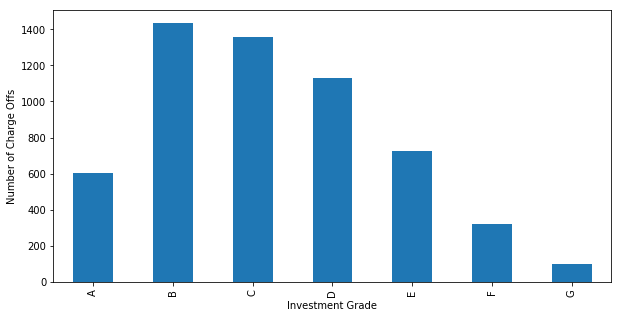

In [6]:
df = pd.DataFrame(all_data)

df.groupby("grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count()).plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Charge Offs")
plt.xlabel("Investment Grade")

new_dataframe = pd.DataFrame()
new_dataframe["Number of Charge Offs"] = df.groupby("grade")["loan_status"].apply(lambda x: x[x=="Charged Off"].count())
print(new_dataframe["Number of Charge Offs"])
                                                                                            
#create a new data frame with just charge off loans.
    
message = "Key Takeaway: This chart indicates that the highest number of laon charge offs occured for people of the \"B\" investment grade."
print(message)

#QUESTION: How do I add another graph that shows the ratio of total charge offs in each investment grade 
#  by the amount of loans made in each of those investment grade categories??  ********